In [1]:
# Sklearn Imports
from sklearn.model_selection import GroupKFold
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


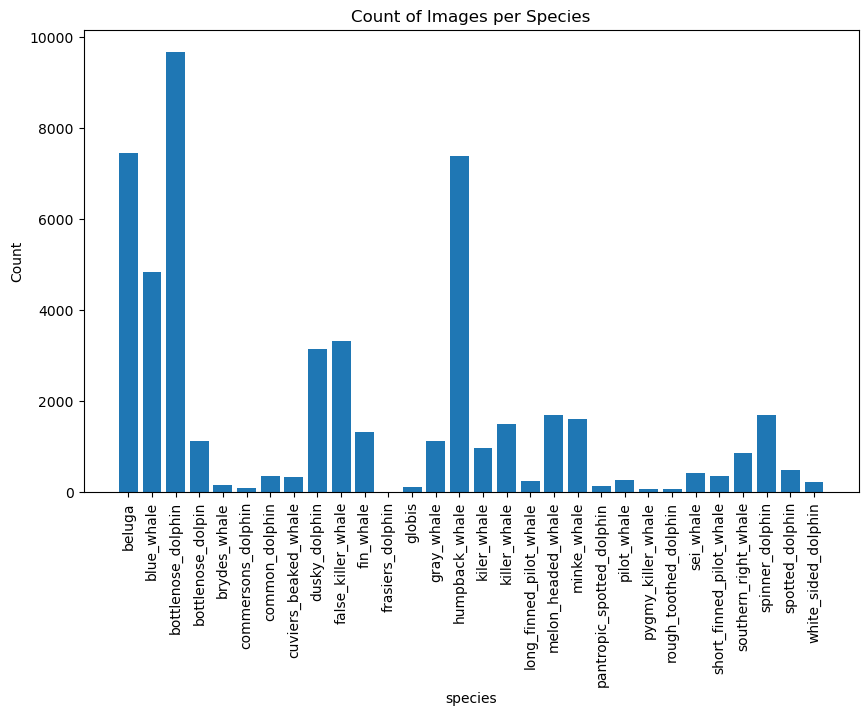

In [4]:
grouped = df.groupby("species")['image'].count()
grouped = grouped.reset_index()
plt.figure(figsize=(10, 6))
plt.bar(grouped['species'], grouped['image'])
plt.xlabel('species')
plt.xticks(rotation=90) 
plt.ylabel('Count')
plt.title('Count of Images per Species')
plt.show()

In [5]:
df.index.size

51033

In [6]:
grouped = df.groupby("individual_id")['image'].count()
grouped = grouped.reset_index()
filtered = grouped[grouped['image'] > 100]

In [7]:
print(f"Number of individual_ids with more than 100 images: {filtered.individual_id.count()}")
print(f"Number of images in training data that belong to individual_ids with more than 100 images: {filtered.image.sum()}")

Number of individual_ids with more than 100 images: 27
Number of images in training data that belong to individual_ids with more than 100 images: 3858


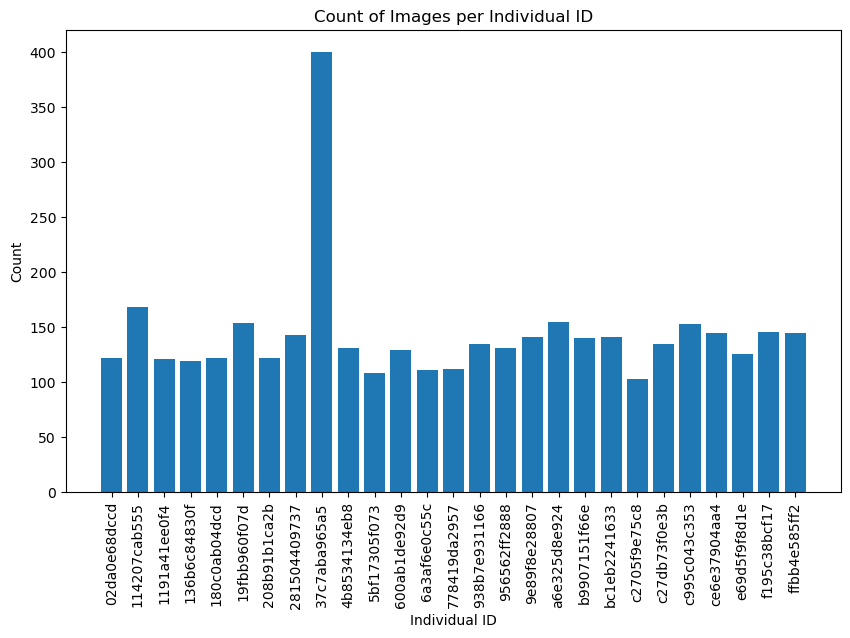

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(filtered['individual_id'], filtered['image'])
plt.xlabel('Individual ID')
plt.xticks(rotation=90) 
plt.ylabel('Count')
plt.title('Count of Images per Individual ID')
plt.show()

In [9]:
# Replacing 'kiler_whale' with 'killer_whale'
df.loc[df['species'] == 'kiler_whale', 'species'] = 'killer_whale'

#replace long finned to pilot whale
df.loc[df['species'] == 'long_finned_pilot_whale', 'species'] = 'pilot_whale'

#replace short finned to pilot whale
df.loc[df['species'] == 'short_finned_pilot_whale', 'species'] = 'pilot_whale'

In [10]:
len(df['species'].unique())

27

In [11]:
grouped = df.groupby("species")['image'].count()
grouped = grouped.reset_index()
grouped

,species,image
0,beluga,7443
1,blue_whale,4830
2,bottlenose_dolphin,9664
3,bottlenose_dolpin,1117
4,brydes_whale,154
5,commersons_dolphin,90
6,common_dolphin,347
7,cuviers_beaked_whale,341
8,dusky_dolphin,3139
9,false_killer_whale,3326


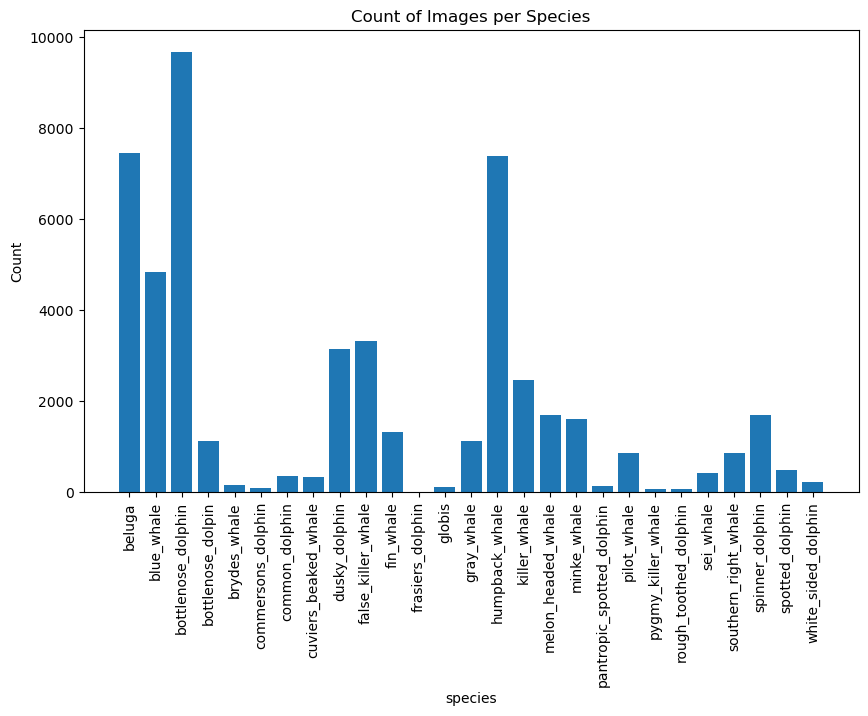

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(grouped['species'], grouped['image'])
plt.xlabel('species')
plt.xticks(rotation=90) 
plt.ylabel('Count')
plt.title('Count of Images per Species')
plt.show()

In [13]:
species = list(df['species'].unique())
species_list = []
for s in species:
    print(s)
    temp = df[df['species'] == s].copy()
    if len(temp) < 100:
        species_list.append(temp)
    else:
        species_list.append(temp.sample(100))
len(species_list)

melon_headed_whale
humpback_whale
false_killer_whale
bottlenose_dolphin
beluga
minke_whale
fin_whale
blue_whale
gray_whale
southern_right_whale
common_dolphin
killer_whale
pilot_whale
dusky_dolphin
sei_whale
spinner_dolphin
bottlenose_dolpin
cuviers_beaked_whale
spotted_dolphin
globis
brydes_whale
commersons_dolphin
white_sided_dolphin
rough_toothed_dolphin
pantropic_spotted_dolphin
pygmy_killer_whale
frasiers_dolphin


27

In [17]:
rep_df = pd.DataFrame()
for s in species_list:
    rep_df = pd.concat([rep_df, s], axis=0)

In [14]:
#I want to label 10000 images
#images_to_label = 2700

#Some species are not well represented
#min_per_species = 1

# Get at least min_per_species rows for each species
#representative_df = df.groupby('species').apply(lambda x: x.sample(n=min_per_species, replace=True)).reset_index(drop=True)

#Now I will sample unique individual_ids for the remaining slots
#remaining_slots = images_to_label - len(representative_df)
#unique_individuals = df.drop_duplicates(subset='individual_id')

# If there are not enough unique individuals, adjust the remaining_slots
#remaining_slots = min(remaining_slots, len(unique_individuals))

#additional_samples = unique_individuals.sample(n=remaining_slots, replace=False)
#representative_df = pd.concat([representative_df, additional_samples])

# Ensure the dataframe is trimmed to "images_to_label" records if over-sampling occurred
#representative_df = representative_df.sample(n=images_to_label, replace=False)

In [21]:
rep_grouped = rep_df.groupby("species")['image'].count()
rep_grouped = rep_grouped.reset_index()
rep_grouped

,species,image
0,beluga,100
1,blue_whale,100
2,bottlenose_dolphin,100
3,bottlenose_dolpin,100
4,brydes_whale,100
5,commersons_dolphin,90
6,common_dolphin,100
7,cuviers_beaked_whale,100
8,dusky_dolphin,100
9,false_killer_whale,100


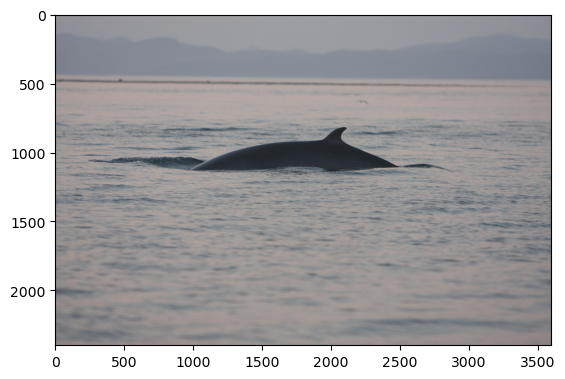

In [23]:
image_path = 'train_images/0106d276033b78.jpg'
image = Image.open(image_path)
image_data = np.array(image)

plt.imshow(image_data)
plt.show()

1. OBJECT DETECTION via YOLO (FastRNN)
    a. download pretrained YOLO
    b. check response -- possibly fine tune for marine mammal category--which would require labeling; 
    c. Try filtering; marine mammals appear to be darker--possible use old fashioned color filtering; morphology 
2. ID which species
3. Create SIAMESE NETWORK 
    1. Embed all the images
    2. Save to a vector DB; may need to create hash : FAISS 
    3. New images --> find what's similar in DB
    
    
    

,image,species,individual_id
28034,8d33aeaa2f7497.jpg,beluga,c3801aa7322f
17410,57baf6918c3905.jpg,beluga,8a99749c1374
22423,7125cd5c6c8772.jpg,beluga,3b9152077a31
13500,440f58838eeec0.jpg,beluga,9124fcbede6d
33959,aab582e9b773b5.jpg,beluga,8d5631d751bc
...,...,...,...
9216,2e3113548753d8.jpg,beluga,2f7e3d26508f
40169,ca1dcbd9f056c4.jpg,beluga,7ab891ff314d
7386,24ed6948187ab8.jpg,beluga,0a67aa3bfe4e
16652,54014e7e7d8318.jpg,beluga,f4cfe9ac98ab


In [26]:
import os
import shutil

# Create the new directory if it doesn't exist
for s in species:
    temp_df = rep_df[rep_df['species'] == s].copy()
    new_folder = s
    if not os.path.exists(new_folder):
        os.makedirs(new_folder)

    # Folder where current images are stored
    source_folder = 'train_images'

    # Iterate through the jpg_name column
    for image_name in temp_df['image']:
        source_path = os.path.join(source_folder, image_name)
        destination_path = os.path.join(new_folder, image_name)

        # Copy the image from the source to the destination
        shutil.copy(source_path, destination_path)

In [ ]:
def get_species(df, image):
    return df[df.image == image].species.values[0]

In [ ]:
get_species(df, "24b4cfaac00f31.jpg")